## Directorio de Trabajo

Este cuaderno de ipython es propiedad de:
El laboratorio de Diseño de Fármacos de Concepción. En convenio con:
Datagen Limitada, Chile.
* Autor : Dr. Alexis Salas Burgos
* Fecha : Noviembre 2015
* Versión: 1.0

Requerimientos Enviromental bio (pip install):
* mdtraj
* tables
* prody

In [3]:
%pylab inline 
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
from prody import parsePDB, parseDCD
import os

Populating the interactive namespace from numpy and matplotlib


# pH2

## Concatenando trayectorias

In [112]:
#Equil
#Concatenando Trajectorias catDCD
directorio_work = "/Users/alsalas/Desktop/UreI_pH2/"
os.chdir(directorio_work)

traj_eq1 = md.load('Equil/prot_popcwi.mineq-01.dcd', top="Ensemble/prot_popcwi.psf")
traj_eq2 = md.load('Equil/prot_popcwi.mineq-02.dcd', top="Ensemble/prot_popcwi.psf")
traj_eq3 = md.load('Equil/prot_popcwi.mineq-03.dcd', top="Ensemble/prot_popcwi.psf")
traj_eqT = traj_eq1.join(traj_eq2)
traj_eqT = traj_eqT.join(traj_eq3)

In [116]:
traj_eqT.save("traj_equilibration.h5")
traj_eqT.save("traj_equilibration.dcd")

## Visualizando RMSD

In [27]:
directorio_work = "/Users/alsalas/Desktop/UreI_pH2/"
os.chdir(directorio_work)
PSF1        = 'Ensemble/prot_popcwi.psf'
PDB1        = 'Ensemble/prot_popcwi.pdb'
DCD1        = 'traj_equilibration.dcd'

In [28]:
structure1 = parsePDB(PDB1)
ensemble1  = parseDCD(DCD1)
ensemble1.setAtoms(structure1)
ensemble1.setCoords(structure1)

@> 199877 atoms and 1 coordinate set(s) were parsed in 1.69s.
DEBUG:.prody:199877 atoms and 1 coordinate set(s) were parsed in 1.69s.
@> DCD file contains 756 coordinate sets for 199877 atoms.
INFO:.prody:DCD file contains 756 coordinate sets for 199877 atoms.
@> DCD file was parsed in 19.60 seconds.
INFO:.prody:DCD file was parsed in 19.60 seconds.
@> 1729.34 MB parsed at input rate 88.24 MB/s.
INFO:.prody:1729.34 MB parsed at input rate 88.24 MB/s.
@> 756 coordinate sets parsed at input rate 38 frame/s.
INFO:.prody:756 coordinate sets parsed at input rate 38 frame/s.


In [29]:
#Only protein
ensemble1.setAtoms(structure1.select('protein and backbone'))

In [30]:
ensemble1.superpose()
rmsd1 = ensemble1.getRMSDs()

@> Superposition completed in 6.59 seconds.
DEBUG:.prody:Superposition completed in 6.59 seconds.


# pH6

In [174]:
#Equil
#Concatenando Trajectorias catDCD
directorio_work = "/Users/alsalas/Desktop/UreI_pH6/"
os.chdir(directorio_work)

traj_eq1 = md.load('Equil/prot_popcwi.mineq-01.dcd', top="Ensemble/prot_popcwi.psf")
traj_eq2 = md.load('Equil/prot_popcwi.mineq-02.dcd', top="Ensemble/prot_popcwi.psf")
traj_eq3 = md.load('Equil/prot_popcwi.mineq-03.dcd', top="Ensemble/prot_popcwi.psf")
traj_eqT = traj_eq1.join(traj_eq2)
traj_eqT = traj_eqT.join(traj_eq3)

In [139]:
traj_eqT.save("traj_equilibration.h5")
traj_eqT.save("traj_equilibration.dcd")

## Visualizando RMSD

In [31]:
directorio_work = "/Users/alsalas/Desktop/UreI_pH6/"
os.chdir(directorio_work)
PSF2        = 'Ensemble/prot_popcwi.psf'
PDB2        = 'Ensemble/prot_popcwi.pdb'
DCD2        = 'traj_equilibration.dcd'

In [32]:
structure2 = parsePDB(PDB2)
ensemble2  = parseDCD(DCD2)
ensemble2.setAtoms(structure2)
ensemble2.setCoords(structure2)

@> 209486 atoms and 1 coordinate set(s) were parsed in 2.03s.
DEBUG:.prody:209486 atoms and 1 coordinate set(s) were parsed in 2.03s.
@> DCD file contains 756 coordinate sets for 209486 atoms.
INFO:.prody:DCD file contains 756 coordinate sets for 209486 atoms.
@> DCD file was parsed in 17.64 seconds.
INFO:.prody:DCD file was parsed in 17.64 seconds.
@> 1812.47 MB parsed at input rate 102.73 MB/s.
INFO:.prody:1812.47 MB parsed at input rate 102.73 MB/s.
@> 756 coordinate sets parsed at input rate 42 frame/s.
INFO:.prody:756 coordinate sets parsed at input rate 42 frame/s.


In [33]:
#Only protein
ensemble2.setAtoms(structure2.select('protein and backbone'))
ensemble2.superpose()
rmsd2 = ensemble2.getRMSDs()

@> Superposition completed in 6.70 seconds.
DEBUG:.prody:Superposition completed in 6.70 seconds.


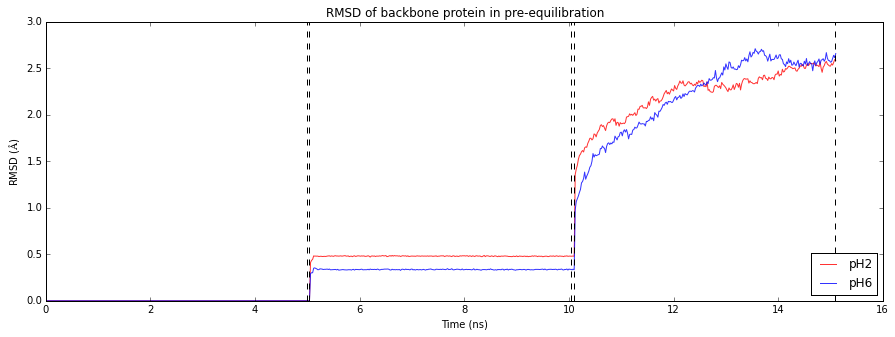

In [34]:
import pylab
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

x = [x*(0.02) for x in range (len(rmsd1))]

ax.plot(x, rmsd1, "r-", linewidth = 1, alpha = 0.8, label = "pH2")
ax.plot(x, rmsd2, "b-", linewidth = 1, alpha = 0.8, label = "pH6")
#ax.plot(x, rmsdC, "g-", linewidth = 1, alpha = 0.8, label = "chain C")
#ax.plot(x, rmsdD, "r--", linewidth = 1, alpha = 0.8, label = "chain D")
#ax.plot(x, rmsdE, "b--", linewidth = 1, alpha = 0.8, label = "chain E")
#ax.plot(x, rmsdF, "g--", linewidth = 1, alpha = 0.8, label = "chain F")

#ax.plot(x[:-1], [y*10 for y in np.diff(rmsd1)], "g-", linewidth = 1, alpha = 0.8, label = "RMSD diff")
#ax.plot(x[:-1], [y*10 for y in np.diff(rmsd2)], "b-", linewidth = 1, alpha = 0.8, label = "RMSD diff")

ax.set_xlabel("Time (ns)")
ax.set_ylabel(r"RMSD ($\AA$)")
ax.set_title("RMSD of backbone protein in pre-equilibration")
ax.legend(loc=4)

#ax.set_xlim([0, 1026])
ax.axvline(x=5,color='k',ls='dashed')
ax.axvline(x=5.03,color='k',ls='dashed')
ax.axvline(x=10.03,color='k',ls='dashed')
ax.axvline(x=10.09,color='k',ls='dashed')
ax.axvline(x=15.09,color='k',ls='dashed')

fig.set_size_inches(15, 5, forward=True)

pylab.savefig("Equil_RMSD.svg", dpi=200)
pylab.savefig("Equil_RMSD.png", dpi=200)

## DM Analysis

In [ ]:
# pH2

In [180]:
#Concatenando Trajectorias catDCD
directorio_work = "/Users/alsalas/Desktop/UreI_pH2/"
os.chdir(directorio_work)
!ls

DM                     Ensemble               Equil                  traj_equilibration.dcd traj_equilibration.h5


In [190]:
traj_dm1 = md.load('DM/prot_popcwi.dm-01.dcd', top="Ensemble/prot_popcwi.psf")
traj_dm2 = md.load('DM/prot_popcwi.dm-02.dcd', top="Ensemble/prot_popcwi.psf")
traj_dm3 = md.load('DM/prot_popcwi.dm-03.dcd', top="Ensemble/prot_popcwi.psf")
traj_dm4 = md.load('DM/prot_popcwi.dm-04.dcd', top="Ensemble/prot_popcwi.psf")

In [191]:
traj_dmT = traj_dm1.join(traj_dm2)
traj_dmT = traj_dmT.join(traj_dm3)
traj_dmT = traj_dmT[::2].join(traj_dm4)
traj_dmT

<mdtraj.Trajectory with 2500 frames, 199877 atoms, 38227 residues, and unitcells at 0x3a8851d90>

In [192]:
traj_dmT.save("traj_dm_0to50.h5")
traj_dmT.save("traj_dm_0to50.dcd")

In [18]:
directorio_work = "/Users/alsalas/Desktop/UreI_pH2/"
os.chdir(directorio_work)
PSF1        = 'Ensemble/prot_popcwi.psf'
PDB1        = 'Ensemble/prot_popcwi.pdb'
DCD1        = 'traj_dm_0to50.dcd'

In [19]:
structure1 = parsePDB(PDB1)
ensemble1  = parseDCD(DCD1)
ensemble1.setAtoms(structure1)
ensemble1.setCoords(structure1)

@> 199877 atoms and 1 coordinate set(s) were parsed in 1.32s.
DEBUG:.prody:199877 atoms and 1 coordinate set(s) were parsed in 1.32s.
@> DCD file contains 2500 coordinate sets for 199877 atoms.
INFO:.prody:DCD file contains 2500 coordinate sets for 199877 atoms.
@> DCD file was parsed in 18.57 seconds.
INFO:.prody:DCD file was parsed in 18.57 seconds.
@> 5718.72 MB parsed at input rate 307.91 MB/s.
INFO:.prody:5718.72 MB parsed at input rate 307.91 MB/s.
@> 2500 coordinate sets parsed at input rate 134 frame/s.
INFO:.prody:2500 coordinate sets parsed at input rate 134 frame/s.


In [20]:
#Only protein
ensemble1.setAtoms(structure1.select('protein and backbone'))
ensemble1.superpose()
rmsd1 = ensemble1.getRMSDs()

@> Superposition completed in 40.40 seconds.
DEBUG:.prody:Superposition completed in 40.40 seconds.


In [ ]:
# pH6

In [4]:
#Concatenando Trajectorias catDCD
directorio_work = "/Users/alsalas/Desktop/UreI_pH6/"
os.chdir(directorio_work)
!ls DM

log                     prot_popcwi.dm-01.xsc   prot_popcwi.dm-02.vel   prot_popcwi.dm-03.dcd   prot_popcwi.dm-04.dcd   prot_popcwi.dm-04b.vel  prot_popcwi.dm-05.xst
prot_popcwi.dm-01.coor  prot_popcwi.dm-01.xst   prot_popcwi.dm-02.xsc   prot_popcwi.dm-03.vel   prot_popcwi.dm-04.xst   prot_popcwi.dm-04b.xsc  restart
prot_popcwi.dm-01.dcd   prot_popcwi.dm-02.coor  prot_popcwi.dm-02.xst   prot_popcwi.dm-03.xsc   prot_popcwi.dm-04b.coor prot_popcwi.dm-04b.xst
prot_popcwi.dm-01.vel   prot_popcwi.dm-02.dcd   prot_popcwi.dm-03.coor  prot_popcwi.dm-03.xst   prot_popcwi.dm-04b.dcd  prot_popcwi.dm-05.dcd


In [5]:
traj_dm1 = md.load('DM/prot_popcwi.dm-01.dcd', top="Ensemble/prot_popcwi.psf")
traj_dm2 = md.load('DM/prot_popcwi.dm-02.dcd', top="Ensemble/prot_popcwi.psf")
traj_dm3 = md.load('DM/prot_popcwi.dm-03.dcd', top="Ensemble/prot_popcwi.psf")
traj_dm4 = md.load('DM/prot_popcwi.dm-04.dcd', top="Ensemble/prot_popcwi.psf")
traj_dm5 = md.load('DM/prot_popcwi.dm-04b.dcd', top="Ensemble/prot_popcwi.psf")
traj_dm6 = md.load('DM/prot_popcwi.dm-05.dcd', top="Ensemble/prot_popcwi.psf")
print(traj_dm1)
print(traj_dm2)
print(traj_dm3)
print(traj_dm4)
print(traj_dm5)
print(traj_dm6)

<mdtraj.Trajectory with 500 frames, 209486 atoms, 41444 residues, and unitcells>
<mdtraj.Trajectory with 500 frames, 209486 atoms, 41444 residues, and unitcells>
<mdtraj.Trajectory with 750 frames, 209486 atoms, 41444 residues, and unitcells>
<mdtraj.Trajectory with 582 frames, 209486 atoms, 41444 residues, and unitcells>
<mdtraj.Trajectory with 167 frames, 209486 atoms, 41444 residues, and unitcells>
<mdtraj.Trajectory with 919 frames, 209486 atoms, 41444 residues, and unitcells>


In [6]:
traj_dmT = traj_dm1[::2].join(traj_dm2[::2])
traj_dmT = traj_dmT.join(traj_dm3)
traj_dmT = traj_dmT.join(traj_dm4)
traj_dmT = traj_dmT.join(traj_dm5)
traj_dmT = traj_dmT.join(traj_dm6[0:500:1])
traj_dmT

<mdtraj.Trajectory with 1999 frames, 209486 atoms, 41444 residues, and unitcells at 0x33fa40550>

In [11]:
traj_dmT.save("traj_dm_0to50.h5")
traj_dmT.save("traj_dm_0to50.dcd")

In [22]:
directorio_work = "/Users/alsalas/Desktop/UreI_pH6/"
os.chdir(directorio_work)
PSF2        = 'Ensemble/prot_popcwi.psf'
PDB2        = 'Ensemble/prot_popcwi.pdb'
DCD2        = 'traj_dm_0to50.dcd'

In [23]:
structure2 = parsePDB(PDB2)
ensemble2  = parseDCD(DCD2)
ensemble2.setAtoms(structure2)
ensemble2.setCoords(structure2)

@> 209486 atoms and 1 coordinate set(s) were parsed in 1.61s.
DEBUG:.prody:209486 atoms and 1 coordinate set(s) were parsed in 1.61s.
@> DCD file contains 2500 coordinate sets for 209486 atoms.
INFO:.prody:DCD file contains 2500 coordinate sets for 209486 atoms.
@> DCD file was parsed in 88.03 seconds.
INFO:.prody:DCD file was parsed in 88.03 seconds.
@> 5993.63 MB parsed at input rate 68.08 MB/s.
INFO:.prody:5993.63 MB parsed at input rate 68.08 MB/s.
@> 2500 coordinate sets parsed at input rate 28 frame/s.
INFO:.prody:2500 coordinate sets parsed at input rate 28 frame/s.


In [24]:
#Only protein
ensemble2.setAtoms(structure2.select('protein and backbone'))
ensemble2.superpose()
rmsd2 = ensemble2.getRMSDs()

@> Superposition completed in 29.46 seconds.
DEBUG:.prody:Superposition completed in 29.46 seconds.


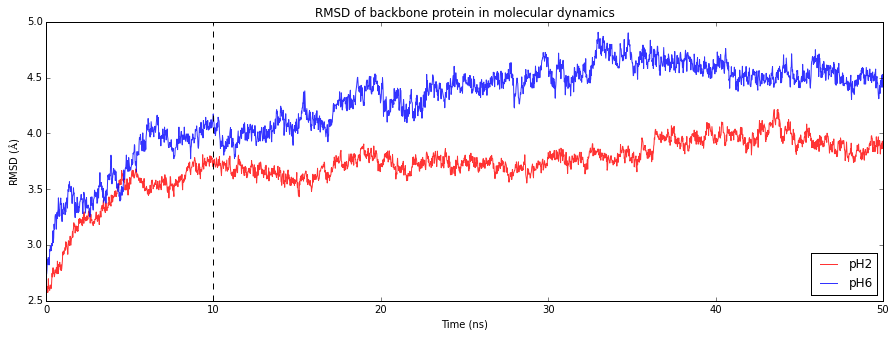

In [26]:
import pylab
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

x = [x*(0.02) for x in range (len(rmsd1))]

ax.plot(x, rmsd1, "r-", linewidth = 1, alpha = 0.8, label = "pH2")
ax.plot(x, rmsd2, "b-", linewidth = 1, alpha = 0.8, label = "pH6")
#ax.plot(x, rmsdC, "g-", linewidth = 1, alpha = 0.8, label = "chain C")
#ax.plot(x, rmsdD, "r--", linewidth = 1, alpha = 0.8, label = "chain D")
#ax.plot(x, rmsdE, "b--", linewidth = 1, alpha = 0.8, label = "chain E")
#ax.plot(x, rmsdF, "g--", linewidth = 1, alpha = 0.8, label = "chain F")

#ax.plot(x[:-1], [y*10 for y in np.diff(rmsd1)], "g-", linewidth = 1, alpha = 0.8, label = "RMSD diff")
#ax.plot(x[:-1], [y*10 for y in np.diff(rmsd2)], "b-", linewidth = 1, alpha = 0.8, label = "RMSD diff")

ax.set_xlabel("Time (ns)")
ax.set_ylabel(r"RMSD ($\AA$)")
ax.set_title("RMSD of backbone protein in molecular dynamics")
ax.legend(loc=4)

#ax.set_xlim([0, 1026])
ax.axvline(x=10,color='k',ls='dashed')
#ax.axvline(x=5.03,color='k',ls='dashed')

fig.set_size_inches(15, 5, forward=True)

pylab.savefig("DM_RMSD.svg", dpi=200)
pylab.savefig("DM_RMSD.png", dpi=200)

In [ ]:
#RMSD for chain

In [162]:
#For chains
directorio_work = "/Users/alsalas/Desktop/UreI_pH2/"
os.chdir(directorio_work)

#Esto funciono perfectamente para la cadena A
traj = md.load('traj_dm_0to50.h5')

In [151]:
keep_protein = traj.topology.select("protein")
traj = traj.atom_slice(keep_protein)

cadenas = ['A','B','C','D','E','F']
atoms_to_keep = {}
for i,c in enumerate(traj.topology.chains):
    print c
    atoms_to_keep[cadenas[i]]=[]
    for at in c.atoms:
        atoms_to_keep[cadenas[i]].append(at.index)

for cadena in atoms_to_keep.keys():
    traj.atom_slice(atoms_to_keep[cadena]).save_dcd("UreI_pH6_cad%s.dcd"%cadena)
    traj[0:1:1].atom_slice(atoms_to_keep[cadena]).save_pdb("UreI_pH6_cad%s.pdb"%cadena)

In [152]:
for cadena in ['A','B','C','D','E','F']:
    PDB = "UreI_pH6_cad%s.pdb"%cadena
    DCD = "UreI_pH6_cad%s.dcd"%cadena
    structure = parsePDB(PDB)
    ensemble  = parseDCD(DCD)
    ensemble.setAtoms(structure)
    ensemble.setCoords(structure)
    
    cmd1 = "ensemble.setAtoms(structure.select('protein and chain %s'))" % cadena
    exec(cmd1)
    ensemble.superpose()
    cmd2 ="rmsd%s = ensemble.getRMSDs()" % cadena
    exec(cmd2)

@> 3100 atoms and 1 coordinate set(s) were parsed in 0.02s.
DEBUG:.prody:3100 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> DCD file contains 2500 coordinate sets for 3100 atoms.
INFO:.prody:DCD file contains 2500 coordinate sets for 3100 atoms.
@> DCD file was parsed in 0.12 seconds.
INFO:.prody:DCD file was parsed in 0.12 seconds.
@> 88.88 MB parsed at input rate 756.74 MB/s.
INFO:.prody:88.88 MB parsed at input rate 756.74 MB/s.
@> 2500 coordinate sets parsed at input rate 21284 frame/s.
INFO:.prody:2500 coordinate sets parsed at input rate 21284 frame/s.
@> Superposition completed in 0.67 seconds.
DEBUG:.prody:Superposition completed in 0.67 seconds.
@> 3100 atoms and 1 coordinate set(s) were parsed in 0.01s.
DEBUG:.prody:3100 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> DCD file contains 2500 coordinate sets for 3100 atoms.
INFO:.prody:DCD file contains 2500 coordinate sets for 3100 atoms.
@> DCD file was parsed in 0.07 seconds.
INFO:.prody:DCD file was parsed i

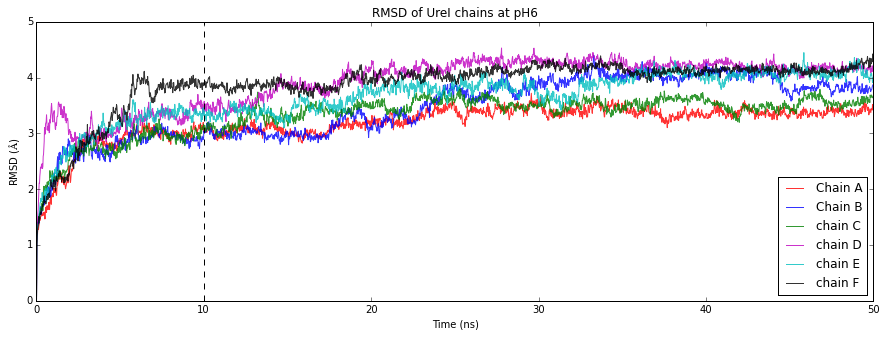

In [155]:
import pylab
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

x = [x*(0.02) for x in range (len(rmsdA))]

ax.plot(x, rmsdA, "r-", linewidth = 1, alpha = 0.8, label = "Chain A")
ax.plot(x, rmsdB, "b-", linewidth = 1, alpha = 0.8, label = "Chain B")
ax.plot(x, rmsdC, "g-", linewidth = 1, alpha = 0.8, label = "chain C")
ax.plot(x, rmsdD, "m-", linewidth = 1, alpha = 0.8, label = "chain D")
ax.plot(x, rmsdE, "c-", linewidth = 1, alpha = 0.8, label = "chain E")
ax.plot(x, rmsdF, "k-", linewidth = 1, alpha = 0.8, label = "chain F")

#ax.plot(x[:-1], [y*10 for y in np.diff(rmsd1)], "g-", linewidth = 1, alpha = 0.8, label = "RMSD diff")
#ax.plot(x[:-1], [y*10 for y in np.diff(rmsd2)], "b-", linewidth = 1, alpha = 0.8, label = "RMSD diff")

ax.set_xlabel("Time (ns)")
ax.set_ylabel(r"RMSD ($\AA$)")
ax.set_title("RMSD of UreI chains at pH6")
ax.legend(loc=4)

#ax.set_xlim([0, 1026])
ax.axvline(x=10,color='k',ls='dashed')
#ax.axvline(x=5.03,color='k',ls='dashed')

fig.set_size_inches(15, 5, forward=True)

pylab.savefig("DM_RMSD_Chain.svg", dpi=200)
pylab.savefig("DM_RMSD_Chain.png", dpi=200)

In [163]:
for cadena in ['A','B','C','D','E','F']:
    PDB = "UreI_pH2_cad%s.pdb"%cadena
    DCD = "UreI_pH2_cad%s.dcd"%cadena
    structure = parsePDB(PDB)
    ensemble  = parseDCD(DCD)
    ensemble.setAtoms(structure)
    ensemble.setCoords(structure)
    ensemble = ensemble[500:]
    cmd2 ="rmsf%s = ensemble.getRMSFs()" % cadena
    exec(cmd2)

@> 3109 atoms and 1 coordinate set(s) were parsed in 0.01s.
DEBUG:.prody:3109 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> DCD file contains 2500 coordinate sets for 3109 atoms.
INFO:.prody:DCD file contains 2500 coordinate sets for 3109 atoms.
@> DCD file was parsed in 0.12 seconds.
INFO:.prody:DCD file was parsed in 0.12 seconds.
@> 89.14 MB parsed at input rate 749.27 MB/s.
INFO:.prody:89.14 MB parsed at input rate 749.27 MB/s.
@> 2500 coordinate sets parsed at input rate 21013 frame/s.
INFO:.prody:2500 coordinate sets parsed at input rate 21013 frame/s.
@> 3109 atoms and 1 coordinate set(s) were parsed in 0.01s.
DEBUG:.prody:3109 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> DCD file contains 2500 coordinate sets for 3109 atoms.
INFO:.prody:DCD file contains 2500 coordinate sets for 3109 atoms.
@> DCD file was parsed in 0.07 seconds.
INFO:.prody:DCD file was parsed in 0.07 seconds.
@> 89.14 MB parsed at input rate 1316.09 MB/s.
INFO:.prody:89.14 MB parsed at inpu

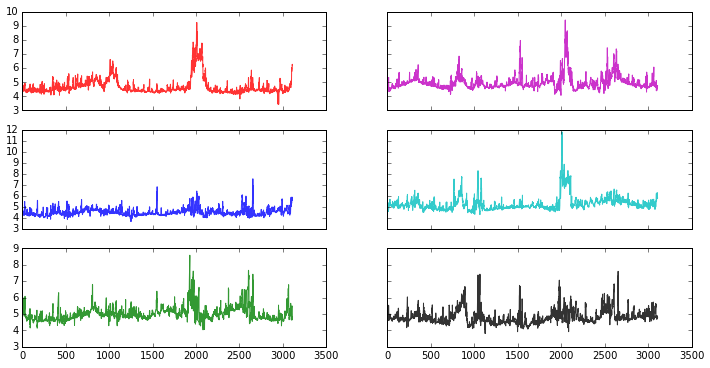

In [164]:
import pylab
import matplotlib.pyplot as plt
import numpy as np

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, sharex='col', sharey='row')

x = range(len(rmsfA))
ax1.plot(x, rmsfA, "r-", linewidth = 1, alpha = 0.8, label = "Chain A")
ax2.plot(x, rmsfD, "m-", linewidth = 1, alpha = 0.8, label = "Chain B")
ax3.plot(x, rmsfB, "b-", linewidth = 1, alpha = 0.8, label = "chain C")
ax4.plot(x, rmsfE, "c-", linewidth = 1, alpha = 0.8, label = "chain D")
ax5.plot(x, rmsfC, "g-", linewidth = 1, alpha = 0.8, label = "chain E")
ax6.plot(x, rmsfF, "k-", linewidth = 1, alpha = 0.8, label = "chain F")
fig.set_size_inches(12, 6, forward=True)

In [102]:
#con mdtraj
def rmsf_res(pdb, dcd, rmsf):
    import numpy as np
    protein = md.load(dcd, top=pdb)
    rmsf_AVG = []
    atoms_count = 0
    for res in protein.topology.residues:
        anterior = atoms_count
        atoms_count += int(res.n_atoms)
        rmsf_average = np.average(rmsf[anterior:atoms_count])
        rmsf_residue = rmsf[anterior:atoms_count]
        rmsf_AVG.append(rmsf_average)
    return rmsf_AVG

In [165]:
#Calcular el rmsf promedio por aminoacido
for cadena in ['A','B','C','D','E','F']:
    pdb = "UreI_pH2_cad%s.pdb"%cadena
    dcd = "UreI_pH2_cad%s.dcd"%cadena
    exec("rmsf_AVG%s = rmsf_res(pdb, dcd, rmsf%s)"%(cadena,cadena))

In [117]:
#Obtener estructura secundaria
def do_dssp(pdbIN):
    import os
    dssp = "/usr/local/bin/mkdssp"
    comando = "%s -i %s.pdb -o %s.dssp" % (dssp, pdbIN, pdbIN)
    os.system(comando)
    
    with open("%s.dssp"%pdbIN, "r") as f:
        #head = "#  RESIDUE AA STRUCTURE BP1 BP2  ACC     N-H-->O    O-->H-N    N-H-->O    O-->H-N    TCO  KAPPA ALPHA  PHI   PSI    X-CA   Y-CA   Z-CA"
        #print [x for x in head.split(" ") if len(x) > 0]
        residue_num  = [0]
        residue_name = ""
        structure2D  = ""
        resnumber = 0
        for l in f.readlines()[25:]:
            residue_name += l[13]
            structure2D  += l[16]
            try:
                resnumber0 = residue_num[-1]
                resnumber = int(l[6:10])
                residue_num.append(resnumber)
            except:
                residue_name = residue_name[:-1]
                structure2D  = structure2D[:-1]
                resnumber0 = residue_num[-1]
            
            if resnumber - resnumber0 > 1:
                gap = "-"*(resnumber-resnumber0-1)
                residue_name = residue_name[:-1]+gap+residue_name[-1]
                structure2D = structure2D[:-1]+gap+structure2D[-1]
     
    return residue_name,structure2D

In [124]:
def get_2dprofile(structure2D, value=-0.04):
    valsH = [None]
    for e in structure2D:
        if e == "H":
            valsH.append(value)
        else:
            valsH.append(None)
    
    valsS = [None]
    for e in structure2D:
        if e == "S":
            valsS.append(value)
        else:
            valsS.append(None)
    
    valsT = [None]
    for e in structure2D:
        if e == "T":
            valsT.append(value)
        else:
            valsT.append(None)
    #print valsH
    return valsH, valsS, valsT

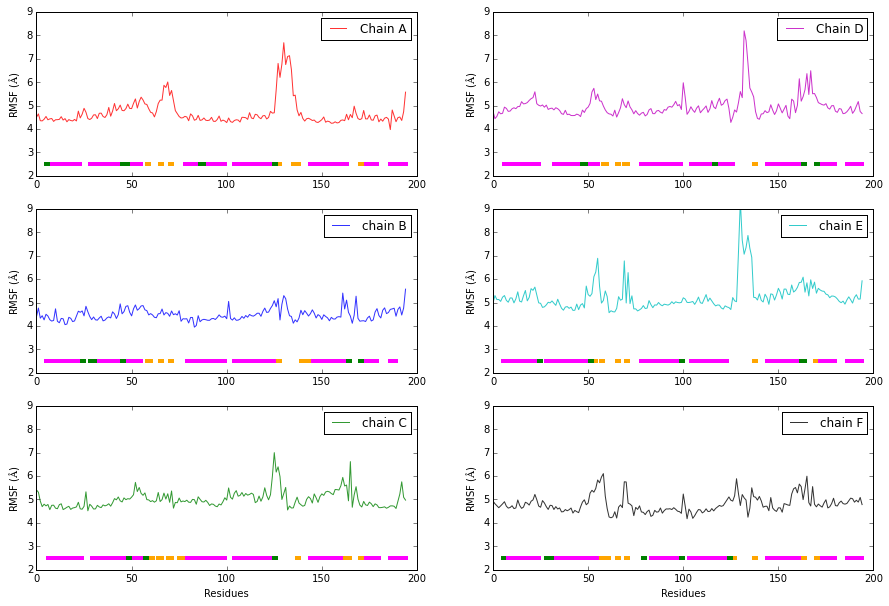

In [167]:
import pylab
import matplotlib.pyplot as plt
import numpy as np

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)#, sharex='col', sharey='row')

x = range(len(rmsf_AVGA))
ax1.plot(x, rmsf_AVGA, "r-", linewidth = 1, alpha = 0.8, label = "Chain A")
ax2.plot(x, rmsf_AVGD, "m-", linewidth = 1, alpha = 0.8, label = "Chain D")
ax3.plot(x, rmsf_AVGB, "b-", linewidth = 1, alpha = 0.8, label = "chain B")
ax4.plot(x, rmsf_AVGE, "c-", linewidth = 1, alpha = 0.8, label = "chain E")
ax5.plot(x, rmsf_AVGC, "g-", linewidth = 1, alpha = 0.8, label = "chain C")
ax6.plot(x, rmsf_AVGF, "k-", linewidth = 1, alpha = 0.8, label = "chain F")

limite_inf = 2; limite_sup = 9
for i in range(6): exec("ax%d.set_ylim([limite_inf, limite_sup])"%(i+1))

for i,cadena in enumerate(['A','B','C','D','E','F']):
    seq, structure2D = do_dssp("UreI_pH2_cad%s"%cadena)
    helix, beta, turn = get_2dprofile(structure2D, limite_inf+0.5)
    exec( "ax%d.plot(helix, color='magenta', linewidth=4)"%(i+1) )
    exec( "ax%d.plot(beta, color='orange', linewidth=4)"%(i+1) )
    exec( "ax%d.plot(turn, color='green', linewidth=4)"%(i+1) )
    
ax5.set_xlabel("Residues")
ax6.set_xlabel("Residues")
ax1.set_ylabel(r"RMSF ($\AA$)")
ax2.set_ylabel(r"RMSF ($\AA$)")
ax3.set_ylabel(r"RMSF ($\AA$)")
ax4.set_ylabel(r"RMSF ($\AA$)")
ax5.set_ylabel(r"RMSF ($\AA$)")
ax6.set_ylabel(r"RMSF ($\AA$)")
ax1.legend(loc=1)
ax2.legend(loc=1)
ax3.legend(loc=1)
ax4.legend(loc=1)
ax5.legend(loc=1)
ax6.legend(loc=1)

fig.set_size_inches(15, 10, forward=True)

pylab.savefig("DM_RMSF_Chain.svg", dpi=200)
pylab.savefig("DM_RMSF_Chain.png", dpi=200)

# # Código de prueba

In [18]:
#For chains
for c in ['A','B','C','D','E','F']:
    cmd1 = "ensemble2.setAtoms(structure2.select('chain %s'))" % c
    exec(cmd1)
    ensemble2.superpose()
    cmd2 ="rmsd%s = ensemble2.getRMSDs()" % c
    exec(cmd2)

@> Superposition completed in 22.98 seconds.
DEBUG:.prody:Superposition completed in 22.98 seconds.
@> Superposition completed in 22.79 seconds.
DEBUG:.prody:Superposition completed in 22.79 seconds.
@> Superposition completed in 22.75 seconds.
DEBUG:.prody:Superposition completed in 22.75 seconds.
@> Superposition completed in 22.61 seconds.
DEBUG:.prody:Superposition completed in 22.61 seconds.
@> Superposition completed in 23.02 seconds.
DEBUG:.prody:Superposition completed in 23.02 seconds.
@> Superposition completed in 23.31 seconds.
DEBUG:.prody:Superposition completed in 23.31 seconds.


In [2]:
#Concatenando Trajectorias catDCD
import mdtraj as md
traj = md.load('prot_popcwi.dm-01.dcd', top="prot_popcwi.psf")
traj2 = md.load('prot_popcwi.dm-02.dcd', top="prot_popcwi.psf")
#traj3 = md.load('prot_popcwi.dm-03.dcd', top="prot_popcwi.psf")
#traj4 = md.load('prot_popcwi.dm-04.dcd', top="prot_popcwi.psf")
#traj5 = md.load('prot_popcwi.dm-04b.dcd', top="prot_popcwi.psf")
#traj6 = md.load('prot_popcwi.dm-05.dcd', top="prot_popcwi.psf")

In [7]:
print repr(traj), traj.time
print('How many residues? %s' % traj.n_residues)

<mdtraj.Trajectory with 500 frames, 209486 atoms, 41444 residues, and unitcells at 0x103688950> [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222

In [88]:
traj = md.load('prot_popcwi.dm-01.dcd', top="prot_popcwi.psf")

In [60]:
#Esto funciono perfectamente para obtener los CA
traj = md.load('prot_popcwi.dm-01.dcd', top="prot_popcwi.psf")
atoms_to_keep = [a.index for a in traj.topology.atoms if a.name == 'CA']
traj.atom_slice(atoms_to_keep)  # this acts inplace on the trajectory
traj.save_dcd('UreI_pH6_CA.dcd')
traj.save_pdb('UreI_pH6_CA.pdb')

In [86]:
#Esto funciono perfectamente para la cadena A
traj = md.load('prot_popcwi.dm-01.dcd', top="prot_popcwi.psf")
atoms_to_keep = []
topology = traj.topology.chain(48)
for at in topology.atoms:
    atoms_to_keep.append(at.index)
    
print(atoms_to_keep[:10])
traj = traj.atom_slice(atoms_to_keep)  # this acts inplace on the trajectory
traj.save_pdb('UreI_pH6_ChainA.pdb')
traj.save_dcd('UreI_pH6_ChainA.dcd')

[82883, 82884, 82885, 82886, 82887, 82888, 82889, 82890, 82891, 82892]


In [101]:
#Esto funciono perfectamente para las aguas
traj = md.load('prot_popcwi.dm-01.dcd', top="prot_popcwi.psf")
atoms_to_keep = traj.topology.select('name O and water')
print(atoms_to_keep[:10])
traj = traj.atom_slice(atoms_to_keep)  # this acts inplace on the trajectory
traj.save_pdb('UreI_pH6_water.pdb')
traj.save_dcd('UreI_pH6_water.dcd')

[8040 8043 8046 8049 8052 8055 8058 8061 8064 8067]


In [104]:
#Esto funciono perfectamente para la proteína
traj = md.load('DM/prot_popcwi.dm-01.dcd', top="DM/prot_popcwi.psf")
atoms_to_keep = traj.topology.select('protein')
print(atoms_to_keep[:10])
traj = traj.atom_slice(atoms_to_keep)  # this acts inplace on the trajectory
traj.save_pdb('UreI_pH6_protein.pdb')
#traj.save_dcd('UreI_pH6_protein.dcd')

[82883 82884 82885 82886 82887 82888 82889 82890 82891 82892]


In [ ]:
full_traj = full_traj.join(traj6)

In [35]:
full_traj

<mdtraj.Trajectory with 2332 frames, 209486 atoms, 41444 residues, and unitcells at 0x80f09d5d0>

In [18]:
import numpy as np
distances = np.empty((traj.n_frames, traj.n_frames))
for i in range(traj.n_frames):
    distances[i] = md.rmsd(traj, traj, i)
print('Max pairwise rmsd: %f nm' % np.max(distances))

Max pairwise rmsd: 7.668022 nm


In [21]:
from __future__ import print_function
%pylab inline 
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy

Populating the interactive namespace from numpy and matplotlib


AttributeError: 'FigureCanvasAgg' object has no attribute 'invalidate'

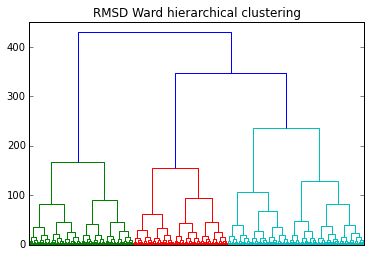

In [23]:
import matplotlib.pyplot as plt
plt.title('RMSD Ward hierarchical clustering')
scipy.cluster.hierarchy.dendrogram(linkage, no_labels=True, count_sort='descendent')